<a href="https://colab.research.google.com/github/priyanshu-buwade/SMES_IoT_Assignments/blob/main/SMES_A3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plot and present the raw signal analysis of mobile embedded 9- axial IMU sensor for 5 different gestures 1- walking, 2- Jogging, 3- Running, 4- stair ascent and, 5-stair descent collected data using python library and train the one deep learning model for classification of gestures.**

---

Import all the necessary pacakages.

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import classification_report

Load the **Training Dataset**.

In [ ]:
from google.colab import files
data = files.upload()
df = pd.read_csv(io.BytesIO(data['Down.csv']))

Creating plots for each gesture in the training dataset.

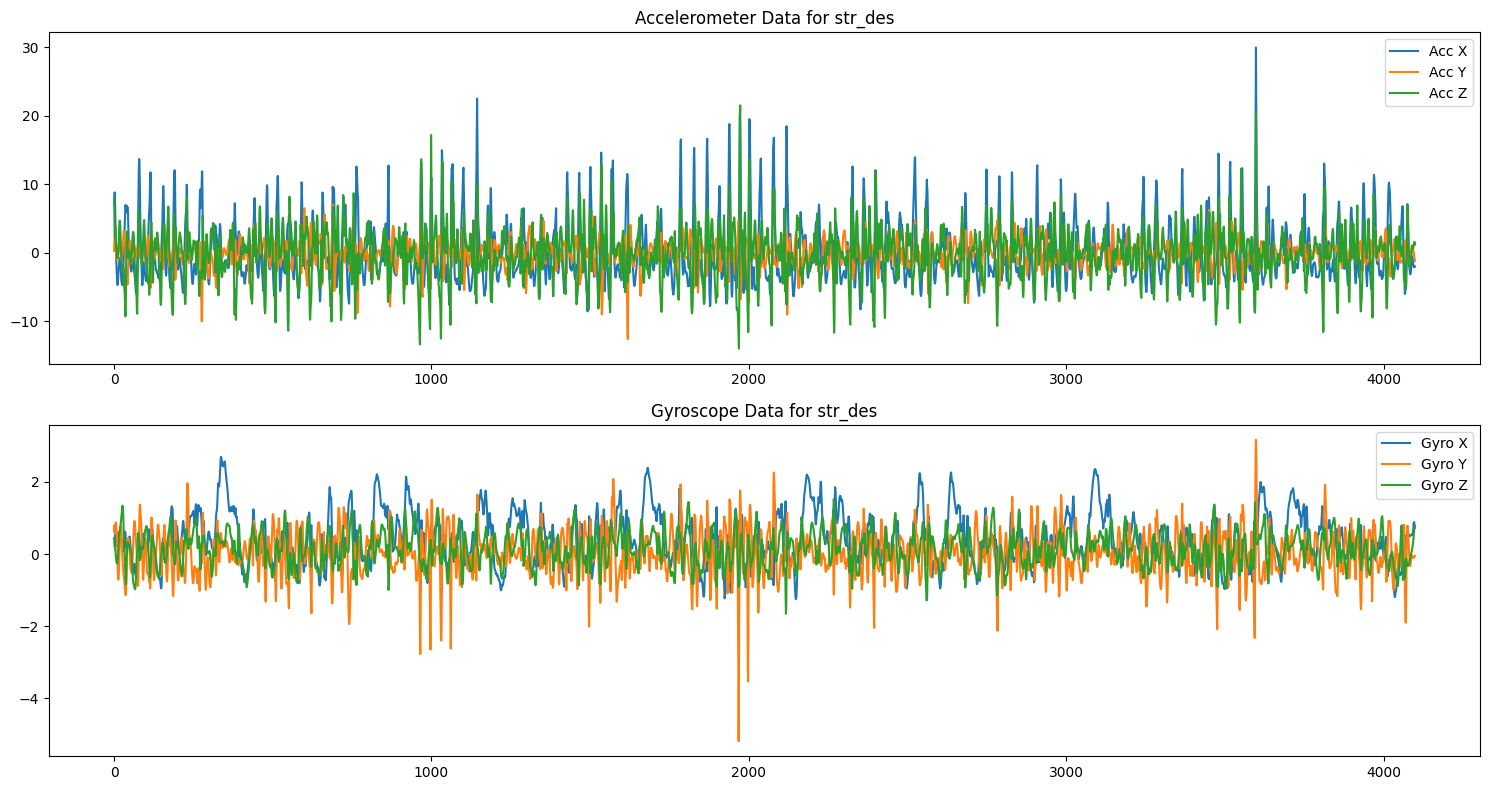

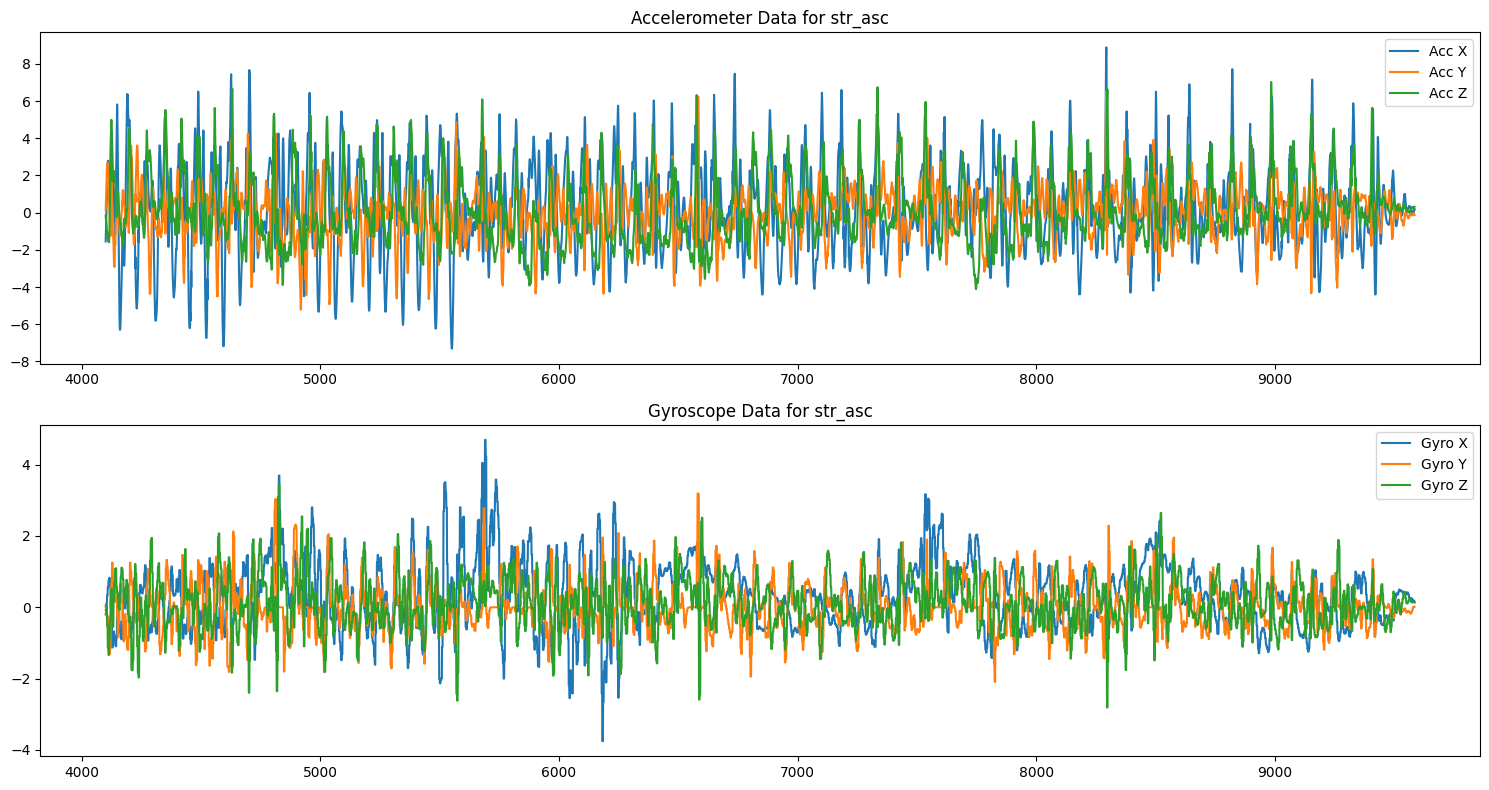

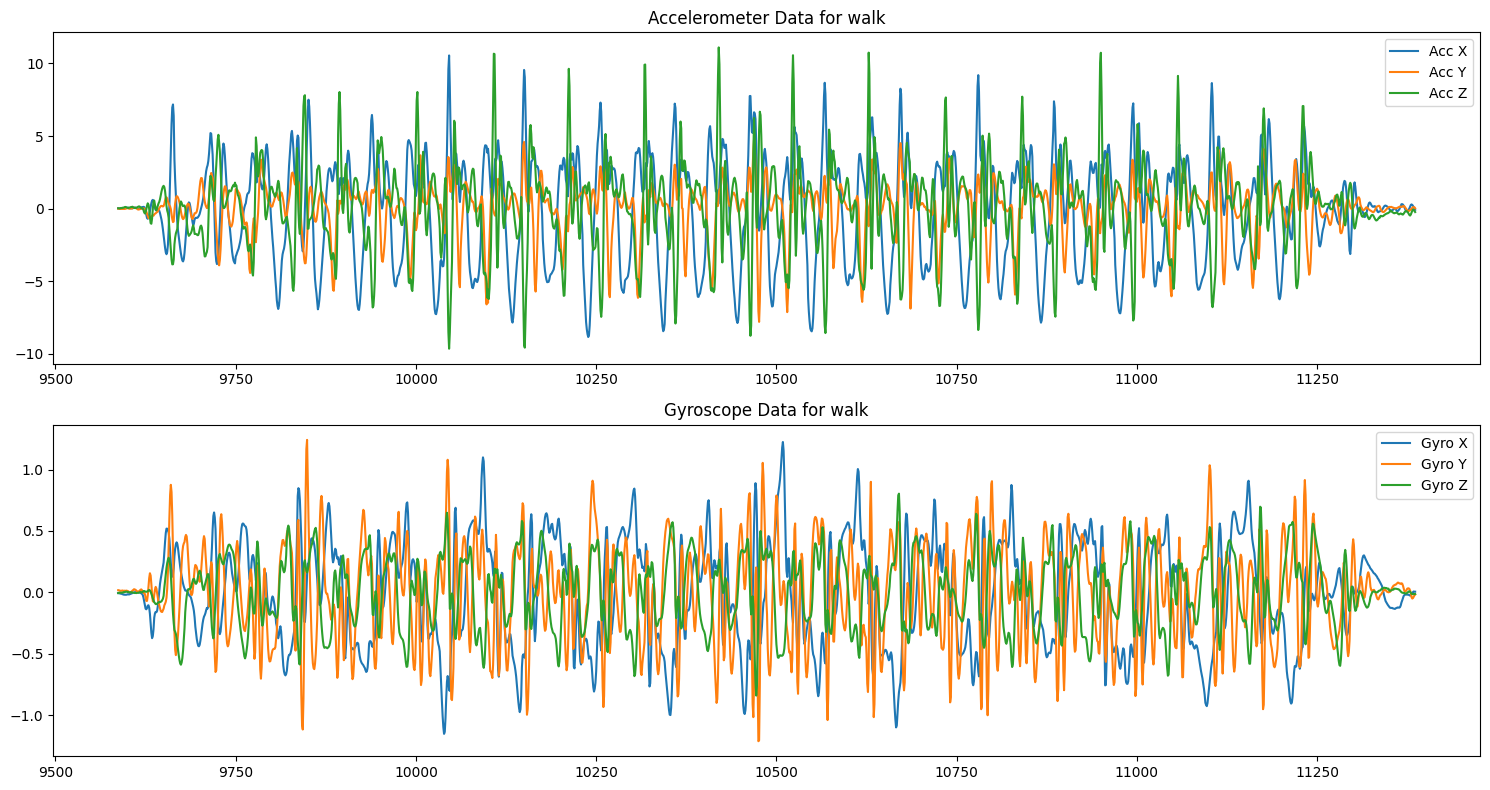

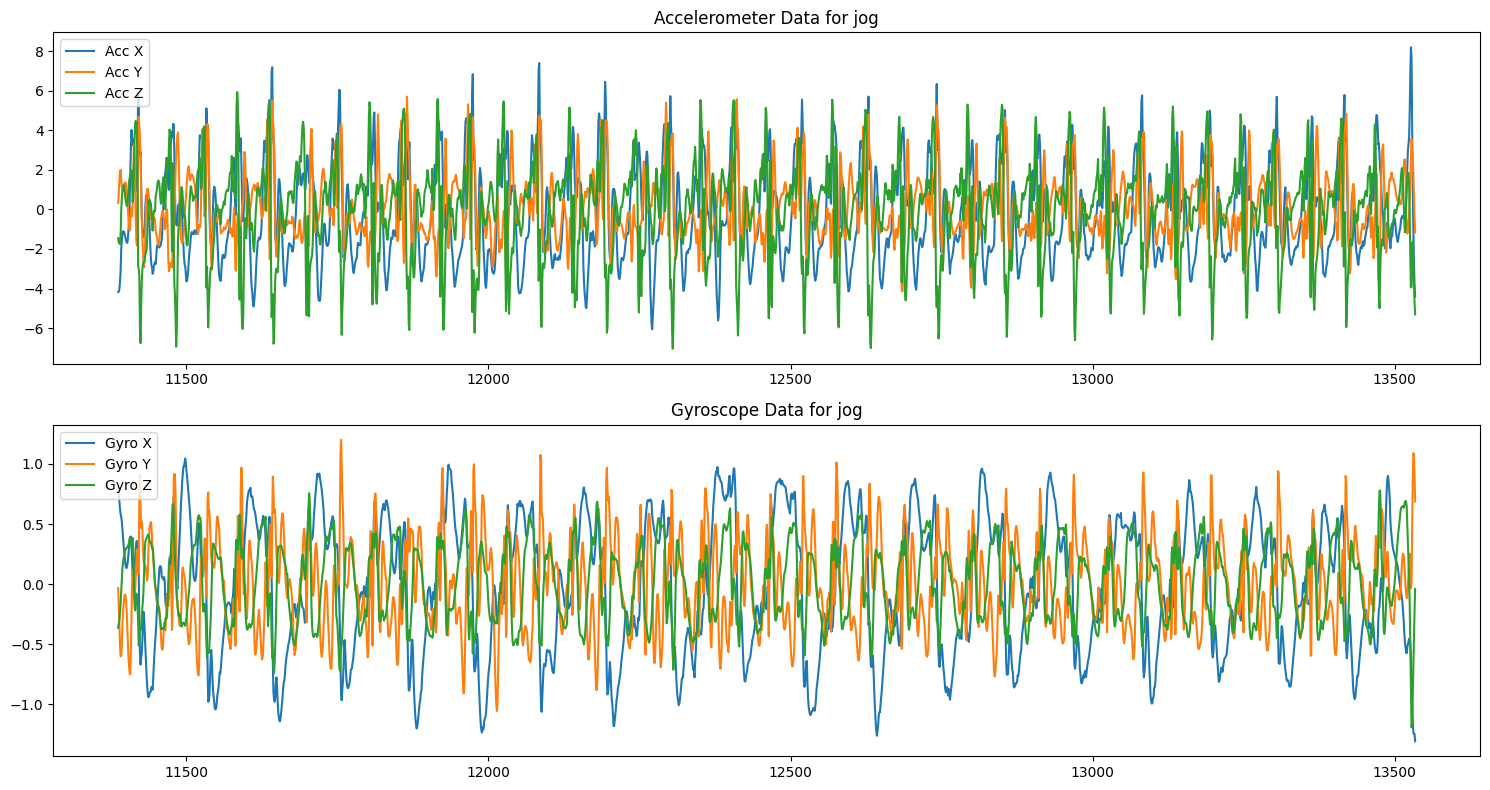

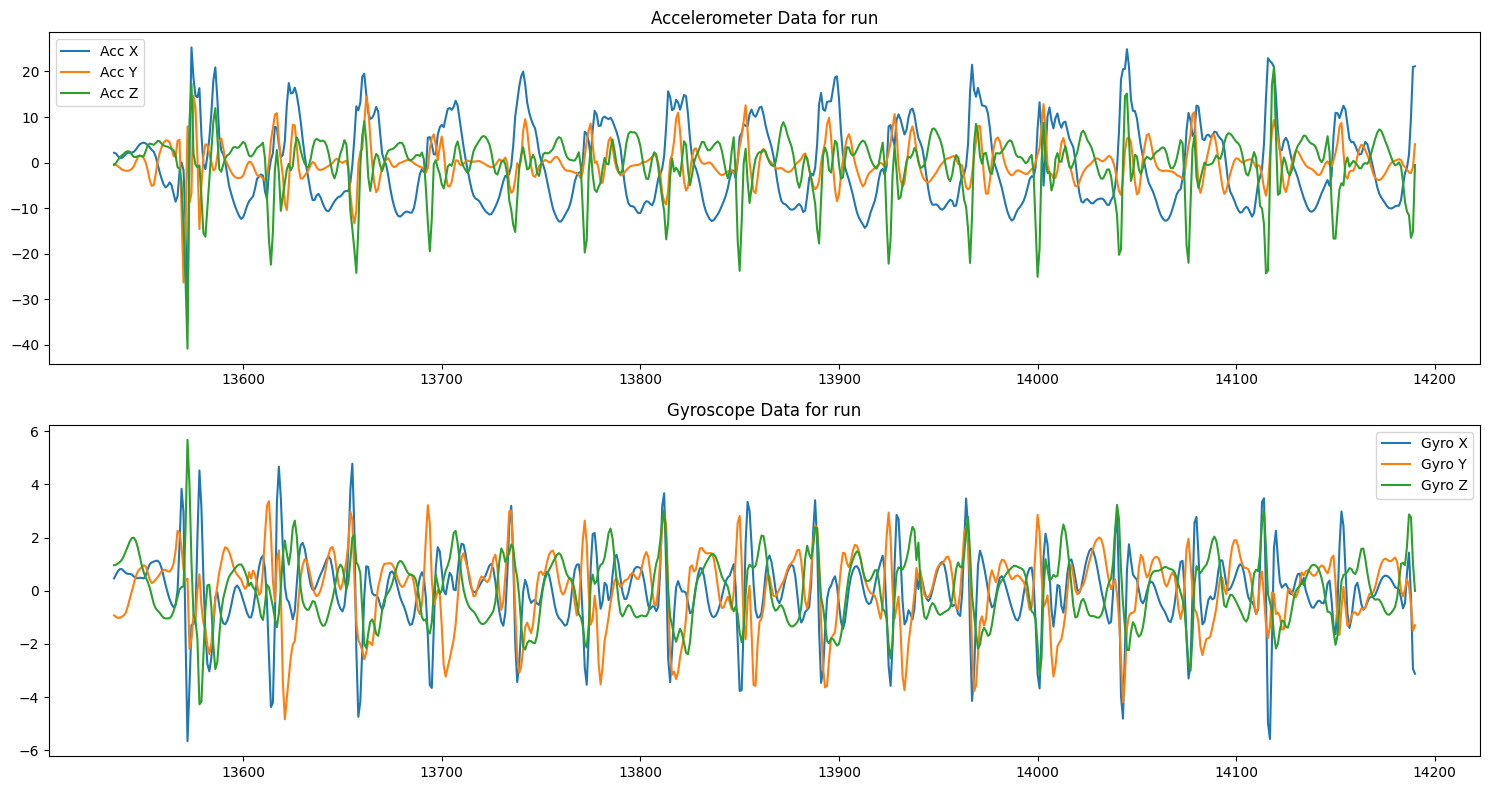

In [ ]:
gestures = df['gesture'].unique() # Access the 'gesture' column from the DataFrame
for gesture in gestures:
    subset = df[df['gesture'] == gesture]
    plt.figure(figsize=(15, 8))

    # Accelerometer data
    plt.subplot(2, 1, 1)
    plt.plot(subset['acc_x'], label='Acc X')
    plt.plot(subset['acc_y'], label='Acc Y')
    plt.plot(subset['acc_z'], label='Acc Z')
    plt.title(f'Accelerometer Data for {gesture}')
    plt.legend()

    # Gyroscope data
    plt.subplot(2, 1, 2)
    plt.plot(subset['gyro_x'], label='Gyro X')
    plt.plot(subset['gyro_y'], label='Gyro Y')
    plt.plot(subset['gyro_z'], label='Gyro Z')
    plt.title(f'Gyroscope Data for {gesture}')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Preproessing** training data, **Creating, Training and Evaluating** the model.

In [ ]:


# Preprocessing
X = df[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']].values # Access data from the DataFrame
y = pd.get_dummies(df['gesture']).values  # One-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(5, activation='softmax'))  # Assuming 5 gestures

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Loading **Testing** Dataset.

In [ ]:
# Load the dataset
from google.colab import files
test_data = files.upload()
test_data = pd.read_csv('Testing.csv')

**Preprocessing** testing data and **Testing** the model on it.

In [ ]:
# Preprocessing the test dataset
X_test = test_data[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']].values
y_test = pd.get_dummies(test_data['gesture']).values  # One-hot encoding

# Reshape for LSTM
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
class_labels = test_data['gesture'].unique()  # Get class labels from the test dataset
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

     str_des       1.00      0.75      0.86         4
     str_asc       1.00      1.00      1.00         2
         jog       0.80      1.00      0.89         4
         run       1.00      1.00      1.00         3
        walk       1.00      1.00      1.00         2

    accuracy                           0.93        15
   macro avg       0.96      0.95      0.95        15
weighted avg       0.95      0.93      0.93        15

